In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import warnings
warnings(fiter_warnings=False)

In [175]:
data=pd.read_csv(r"C:\Users\shash\Downloads\json-to-csv.csv")
data=data.sample(len(data))

In [176]:
data=data[data["lang"]=="en"]
data.shape

(87, 8)

In [177]:
data.columns

Index(['created_at', 'full_text', 'user/name', 'user/screen_name',
       'user/location', 'user/followers_count', 'user/friends_count', 'lang'],
      dtype='object')

In [178]:
data.head()

,created_at,full_text,user/name,user/screen_name,user/location,user/followers_count,user/friends_count,lang
27,Mon Jul 17 14:24:12 +0000 2023,RT @ePremKishor: @sushantkumar67 @Bajaj_Finser...,Sibhani Mahatre,shibanirekt,"Bengaluru, India",550,650,en
92,Mon Jul 17 06:30:00 +0000 2023,A financial plan is the foundation for a busin...,Bajaj_Finserv,Bajaj_Finserv,India,66961,10,en
13,Mon Jul 17 15:36:33 +0000 2023,Not everything can be said in words\n#WorldEmo...,Bajaj_Finserv,Bajaj_Finserv,India,66961,10,en
59,Mon Jul 17 11:53:15 +0000 2023,@Toibur_sync @Bajaj_Finserv If u want get rid ...,Amit Gaur,AmittGaur,NaN,145,302,en
94,Mon Jul 17 05:46:49 +0000 2023,Now build a solid credit score shopping on EMI...,Bajaj_Finserv,Bajaj_Finserv,India,66961,10,en


## INTENT ANALYSIS

In [179]:
intent=pkl.load(open("intent_classification.pkl","rb"))
intent_tfidf=pkl.load(open("intent_classification_tfidf.pkl","rb"))

In [180]:
def predict_intent(s):
    s=[s]
    d=intent.predict(intent_tfidf.transform(s))
    if d[0][0] == 1:
        return "enquiry"
    elif d[0][1] == 1:
        return "general talk"
    else:
        return "complaint"

In [181]:
data["intent"]=data["full_text"].apply(lambda x:predict_intent(x))

In [182]:
data["intent"].value_counts()

general talk    44
complaint       39
enquiry          4
Name: intent, dtype: int64

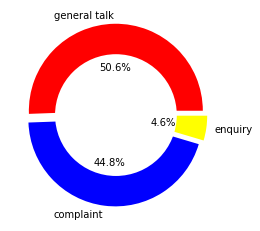

In [183]:
Salary = data["intent"].value_counts()
colors = ['#FF0000', '#0000FF', '#FFFF00']
explode = (0.05, 0.05, 0.05)
plt.pie(Salary, colors=colors, labels=data["intent"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.5,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [184]:
data_complaint=data[data["intent"]=="complaint"]
data_enquiry=data[data["intent"]=="enquiry"]

## SENTIMENT ANALYSIS

In [185]:
sentiment=pkl.load(open("tweet_clf.pkl","rb"))
sentiment_tfidf=pkl.load(open("tweet_tfidf.pkl","rb"))

In [186]:
def predict_sentiment(s):
    s=[s]
    d=sentiment.predict(sentiment_tfidf.transform(s))
    if d[0]==1:
        return "positive"
    else:
        return "negative"

In [187]:
data["sentiment"]=data["full_text"].apply(lambda x:predict_sentiment(x))

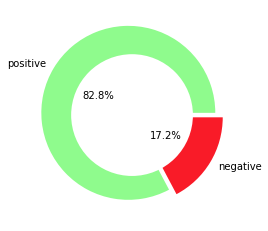

In [188]:
Salary = data["sentiment"].value_counts()
colors = ['#8ffb8d', '#f91b28']
explode = (0.05, 0.05)
plt.pie(Salary, colors=colors, labels=data["sentiment"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.4,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

## SERVICE ANALYSIS

In [189]:
service=pkl.load(open("service_model.pkl","rb"))
service_tfidf=pkl.load(open("service_model_tfidf.pkl","rb"))

In [190]:
def predict_service(s):
    s=[s]
    d=service.predict(service_tfidf.transform(s))
    if d[0][0]==1:
        return "EMI"
    elif d[0][1]==1:
        return "insurance"
    elif d[0][2]==1:
        return "investment"
    elif d[0][3]==1:
        return "loan"
    elif d[0][4]==1:
        return "savings"
    else:
        return "card"

In [191]:
data["service"]=data["full_text"].apply(lambda x:predict_service(x))

In [192]:
data["service"].value_counts()

card          78
EMI            6
loan           2
investment     1
Name: service, dtype: int64

<BarContainer object of 4 artists>

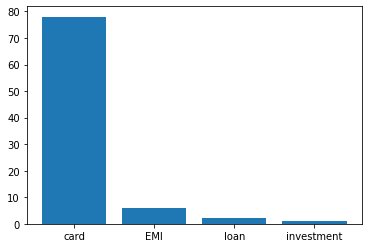

In [201]:
plt.bar(data["service"].value_counts().index,data["service"].value_counts())